# 零售业用户人群分析——基于K means聚类算法

## 1. 加载需要的包并导入数据

In [19]:
# 加载pandas包并重命名
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
# 利用read_csv函数读入工作空间内的csv文件，赋值给变量“data”
data = pd.read_csv('Mall_Customers.csv')
# 由于data变量为数据框型格式，可使用.head()打印数据前五行进行预览，确认导入数据准确
data.head()

,CustomerID,Gender,Age,Annual_Income (k$),Spending_Score,visits_p12,morning_visits_p12,afternoon_visit_p12,evening_visits_p12,morning_spending_score,...,weekend_visits_p12,weekday_spending_score,weekend_spending_score,fiirst_visit_till_today,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,4,Female,23,16,77,44,44,0,0,77,...,0,77,0,269.0,0,0,0,77,0,0
1,2,Male,21,15,81,120,0,120,0,0,...,0,81,0,210.0,0,0,0,81,0,0
2,3,Female,20,16,6,2,0,0,2,0,...,2,0,6,157.0,0,2,0,3,3,0
3,1,Male,19,15,39,10,0,0,10,0,...,0,39,0,634.0,0,8,0,30,9,0
4,61,Male,70,46,56,31,0,0,31,0,...,13,40,16,700.0,0,31,6,50,0,0


## 2. 将文本型数据Gender替换为数值型变量，女性替换为1，男性替换为0

In [20]:
# 加载需要的包并重命名
import numpy as np
# 用【】访问数据框内特定字段并用==筛选特定值，再嵌套进.Gender【】查询对应记录并用=赋值成新值
data.Gender[data['Gender'] == 'Female']=1
data.Gender[data['Gender'] == 'Male']=0
# 预览变更后变量前五行结果
data.head()

,CustomerID,Gender,Age,Annual_Income (k$),Spending_Score,visits_p12,morning_visits_p12,afternoon_visit_p12,evening_visits_p12,morning_spending_score,...,weekend_visits_p12,weekday_spending_score,weekend_spending_score,fiirst_visit_till_today,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,4,1,23,16,77,44,44,0,0,77,...,0,77,0,269.0,0,0,0,77,0,0
1,2,0,21,15,81,120,0,120,0,0,...,0,81,0,210.0,0,0,0,81,0,0
2,3,1,20,16,6,2,0,0,2,0,...,2,0,6,157.0,0,2,0,3,3,0
3,1,0,19,15,39,10,0,0,10,0,...,0,39,0,634.0,0,8,0,30,9,0
4,61,0,70,46,56,31,0,0,31,0,...,13,40,16,700.0,0,31,6,50,0,0


## 3. 选取聚类特征并建立K means聚类器

In [3]:
# 加载聚类器KMeans
from sklearn.cluster import KMeans

In [4]:
# 初始化聚类器参数，指定聚类组数为2，最大迭代次数为300
KMeans(n_clusters=2,max_iter=300)

KMeans(n_clusters=2)

## 4. 利用性别，年龄，收入，花费进行聚类，尝试解读质心

In [5]:
# 利用.fit()训练聚类器，指定使用维度为data中的四项，训练好的聚类器赋值给变量CustomerGroupKmeans
CustomerGroupKmeans = KMeans(n_clusters=2,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score']])

# 利用.cluster_centers_采集聚类器质心，并利用DataFrame函数将质心转化为数据框格式，并且加入四项列名方便阅读
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score'])

,Gender,Age,Annual_Income (k$),Spending_Score
0,0.565217,46.165217,59.365217,32.886957
1,0.552941,28.952941,62.176471,73.623529


In [6]:
# 为了可视化加载matplotlib包
import matplotlib.pyplot as plt

# 生成画布
plt.figure()

# 生成散点图，指定双轴取值，指定颜色分类字段
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)

# 生成图片标题
plt.title("K-means test")

# 打印图片
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
# 改变聚类组数到4组重新训练
CustomerGroupKmeans = KMeans(n_clusters=4,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score'])

,Gender,Age,Annual_Income (k$),Spending_Score
0,0.500000,24.821429,28.714286,74.250000
1,0.538462,32.692308,86.538462,82.128205
2,0.621053,44.894737,48.705263,42.631579
3,0.473684,40.394737,87.000000,18.631579


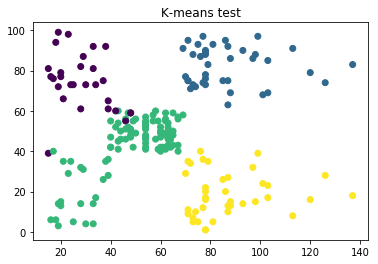

In [8]:
# 重新画图展示4组时候的聚类结果
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

In [9]:
# 改变聚类组数到5组重新训练
CustomerGroupKmeans = KMeans(n_clusters=5,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score'])

,Gender,Age,Annual_Income (k$),Spending_Score
0,0.582278,43.088608,55.291139,49.569620
1,0.608696,25.521739,26.304348,78.565217
2,0.538462,32.692308,86.538462,82.128205
3,0.472222,40.666667,87.750000,17.583333
4,0.608696,45.217391,26.304348,20.913043


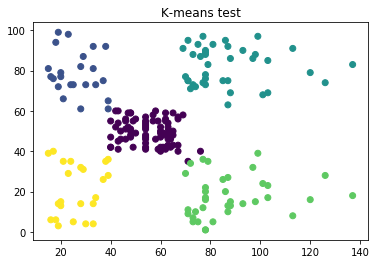

In [10]:
# 重新画图展示5组时候的聚类结果
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

## 5. 接下去要加入周中周末的维度，最佳组数可能会变

In [11]:
# 修改组数到10，并加入周中周末的防次和花费重新训练聚类器
CustomerGroupKmeans = KMeans(n_clusters=10,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score'])

,Gender,Age,Annual_Income (k$),Spending_Score,weekday_visits_p12,weekend_visits_p12,visits_p12,weekday_spending_score,weekend_spending_score
0,0.473684,33.947368,83.631579,82.736842,13.105263,13.736842,26.842105,13.789474,68.947368
1,0.458333,40.041667,85.333333,13.666667,14.083333,15.166667,29.250000,4.500000,9.166667
2,0.666667,39.200000,51.800000,49.100000,6.600000,5.700000,12.300000,12.066667,37.033333
3,0.575758,38.454545,60.151515,46.606061,20.575758,26.727273,47.303030,7.303030,39.303030
4,0.384615,56.230769,79.384615,37.000000,22.461538,70.846154,93.307692,9.153846,27.846154
5,0.666667,31.777778,93.888889,82.444444,26.777778,49.000000,75.777778,11.777778,70.666667
6,0.619048,44.142857,25.142857,19.523810,7.380952,7.523810,14.904762,5.904762,13.619048
7,0.600000,25.600000,26.750000,79.400000,5.200000,6.550000,11.750000,19.650000,59.750000
8,0.652174,36.043478,64.434783,65.304348,32.913043,8.000000,40.913043,41.478261,23.826087
9,0.250000,54.250000,64.250000,50.750000,82.875000,16.500000,99.375000,40.875000,9.875000


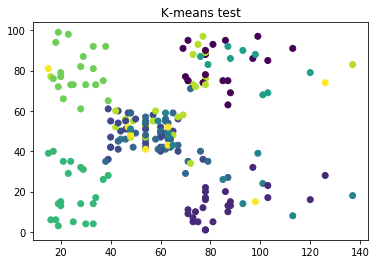

In [12]:
# 重新画图展示
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

## 6. 继续加入是否带小孩，陪伴侣，各项花费细分等

In [13]:
# 聚类组数变为12，再加入是否带小孩儿，是否陪伴侣，各项花费细分后重新训练聚类器
CustomerGroupKmeans = KMeans(n_clusters=12,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score'])

,Gender,Age,Annual_Income (k$),Spending_Score,weekday_visits_p12,weekend_visits_p12,visits_p12,weekday_spending_score,weekend_spending_score,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,0.687500,36.312500,50.875000,62.000000,4.937500,5.312500,10.250000,12.750000,49.250000,6.937500,1.875000,2.687500,40.625000,6.812500,11.875000
1,0.590909,31.954545,78.181818,82.090909,18.772727,13.772727,32.545455,21.272727,60.818182,9.909091,17.727273,55.409091,14.500000,10.000000,2.181818
2,0.307692,45.538462,88.384615,16.769231,30.461538,43.769231,74.230769,4.153846,12.615385,41.846154,12.153846,6.000000,6.384615,3.307692,1.076923
3,0.714286,42.785714,53.214286,53.857143,26.428571,6.357143,32.785714,38.142857,15.714286,13.000000,8.142857,17.071429,29.500000,4.000000,3.285714
4,0.523810,39.523810,85.476190,16.809524,9.714286,8.952381,18.666667,6.285714,10.523810,7.476190,7.761905,5.190476,3.952381,5.714286,1.952381
5,0.454545,31.727273,94.909091,83.909091,39.090909,38.363636,77.454545,21.909091,62.000000,65.909091,5.363636,24.909091,34.636364,8.181818,16.181818
6,0.333333,59.333333,48.333333,52.833333,82.333333,16.333333,98.666667,45.000000,7.833333,36.000000,29.500000,24.000000,21.500000,4.333333,3.000000
7,0.666667,34.916667,62.416667,53.250000,19.833333,28.541667,48.375000,11.625000,41.625000,30.791667,8.583333,18.750000,10.833333,9.916667,13.750000
8,0.461538,30.076923,36.538462,79.153846,5.230769,4.461538,9.692308,18.230769,60.923077,6.923077,2.461538,2.153846,16.461538,48.461538,12.076923
9,0.586207,34.689655,50.655172,51.448276,13.862069,12.137931,26.000000,11.689655,39.758621,4.137931,18.379310,40.241379,5.517241,3.724138,1.965517


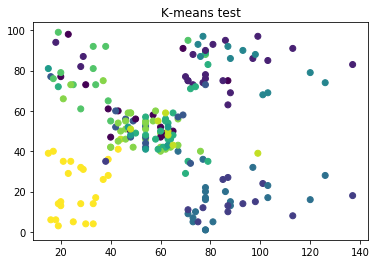

In [14]:
# 重新画图展示
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

In [15]:
# 将聚类器的最终聚类结果标签添加到data数据框中
data['Kmeans_result']=CustomerGroupKmeans.labels_

In [16]:
# 将带有聚类标签的data存成csv文件输出到工作空间，取名为"CustomerGroup_k_means_result.csv"
data.to_csv("CustomerGroup_k_means_result.csv")

In [17]:
# 将最终12组的聚类中心附加上列名并存储成csv文件输出到工作空间，取名为"label_centers.csv"
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score']).to_csv("label_centers.csv")

In [18]:
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score'])

,Gender,Age,Annual_Income (k$),Spending_Score,weekday_visits_p12,weekend_visits_p12,visits_p12,weekday_spending_score,weekend_spending_score,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,0.687500,36.312500,50.875000,62.000000,4.937500,5.312500,10.250000,12.750000,49.250000,6.937500,1.875000,2.687500,40.625000,6.812500,11.875000
1,0.590909,31.954545,78.181818,82.090909,18.772727,13.772727,32.545455,21.272727,60.818182,9.909091,17.727273,55.409091,14.500000,10.000000,2.181818
2,0.307692,45.538462,88.384615,16.769231,30.461538,43.769231,74.230769,4.153846,12.615385,41.846154,12.153846,6.000000,6.384615,3.307692,1.076923
3,0.714286,42.785714,53.214286,53.857143,26.428571,6.357143,32.785714,38.142857,15.714286,13.000000,8.142857,17.071429,29.500000,4.000000,3.285714
4,0.523810,39.523810,85.476190,16.809524,9.714286,8.952381,18.666667,6.285714,10.523810,7.476190,7.761905,5.190476,3.952381,5.714286,1.952381
5,0.454545,31.727273,94.909091,83.909091,39.090909,38.363636,77.454545,21.909091,62.000000,65.909091,5.363636,24.909091,34.636364,8.181818,16.181818
6,0.333333,59.333333,48.333333,52.833333,82.333333,16.333333,98.666667,45.000000,7.833333,36.000000,29.500000,24.000000,21.500000,4.333333,3.000000
7,0.666667,34.916667,62.416667,53.250000,19.833333,28.541667,48.375000,11.625000,41.625000,30.791667,8.583333,18.750000,10.833333,9.916667,13.750000
8,0.461538,30.076923,36.538462,79.153846,5.230769,4.461538,9.692308,18.230769,60.923077,6.923077,2.461538,2.153846,16.461538,48.461538,12.076923
9,0.586207,34.689655,50.655172,51.448276,13.862069,12.137931,26.000000,11.689655,39.758621,4.137931,18.379310,40.241379,5.517241,3.724138,1.965517
